In [1]:
from ForecastDataPrep import ForecastDataPreparation

In [2]:
DataPrep = ForecastDataPreparation()

In [3]:
DataPrep.Run()

Data Preparation Started
PreProcess Started
PromotionsPrep Started
PromotionsPrep Ended
PreProcess Ended
Main Started
SparkOpetaions Started
SparkOpetaions Ended
write started
write ended
Main Ended
Data Preparation Completed Successfully


In [1]:
import pandas as pd

In [2]:
data_prep = pd.read_parquet('Data/Sales_Data_v2.parquet')

In [10]:
data_prep["Date"].count()

8931111

In [12]:
data_prep.head()

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,isPromoted,Discount,BeginDate,EndDate,Promo,DStep,WeekStartDate
0,2023-01-02,2854453,2879223,2878715,568,29,Afyon,DİNAR,30601,10,0,0,0.0,NaT,NaT,None,0.0,2023-01-02
1,2022-06-29,2867763,2879249,2878795,568,29,Gaziantep,ŞEHİTKAMİL,270202,15,0,0,0.0,NaT,NaT,None,0.0,2022-06-27
2,2023-01-04,2877675,2879223,2878715,568,29,Uşak,BANAZ,640101,3,0,0,0.0,NaT,NaT,None,0.0,2023-01-02
3,2022-06-29,2918985,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,15,0,0,0.0,NaT,NaT,None,0.0,2022-06-27
4,2023-01-04,2854545,2879223,2878715,568,29,Afyon,MERKEZ,30001,20,0,0,0.0,NaT,NaT,None,0.0,2023-01-02


In [20]:
by = ["Date","ProductId","isPromoted"]

In [34]:
data_prep[data_prep.Promo.isnull()].groupby("ProductId").ProductId.count()\
/data_prep.groupby("ProductId").ProductId.count()

ProductId
14     0.392871
15     1.000000
16     0.469178
20     0.744872
21     0.822796
25     1.000000
29     0.973098
30     0.246618
32     0.487455
38     0.330767
39     0.515496
41     0.141936
45     1.000000
49     0.518673
64     1.000000
72     1.000000
76     1.000000
138    0.875694
148    0.449941
163    1.000000
Name: ProductId, dtype: float64

In [4]:
from matplotlib import pyplot as plt

In [7]:
a = data_prep.groupby(by=["ProductId","Date"],as_index=False).isPromoted.mean()
c = a.groupby("ProductId")

In [12]:
abc = data_prep[data_prep.ProductId==29].groupby("City",as_index=False).isPromoted.mean()

In [14]:
abc[abc.isPromoted>0]

,City,isPromoted
0,Adana,0.037165
1,Adıyaman,0.033879
2,Afyon,0.053659
3,Afyonkarahisar,0.026316
4,Aksaray,0.029250
...,...,...
78,Çorum,0.037217
79,İstanbul,0.048023
80,İzmir,0.031788
81,Şanlıurfa,0.046824


In [8]:
a

,ProductId,Date,isPromoted
0,14,2022-02-01,0.510856
1,14,2022-02-02,0.607874
2,14,2022-02-03,0.561404
3,14,2022-02-04,0.530612
4,14,2022-02-05,0.434783
...,...,...,...
12067,163,2023-09-22,0.000000
12068,163,2023-09-24,0.000000
12069,163,2023-09-25,0.000000
12070,163,2023-09-29,0.000000


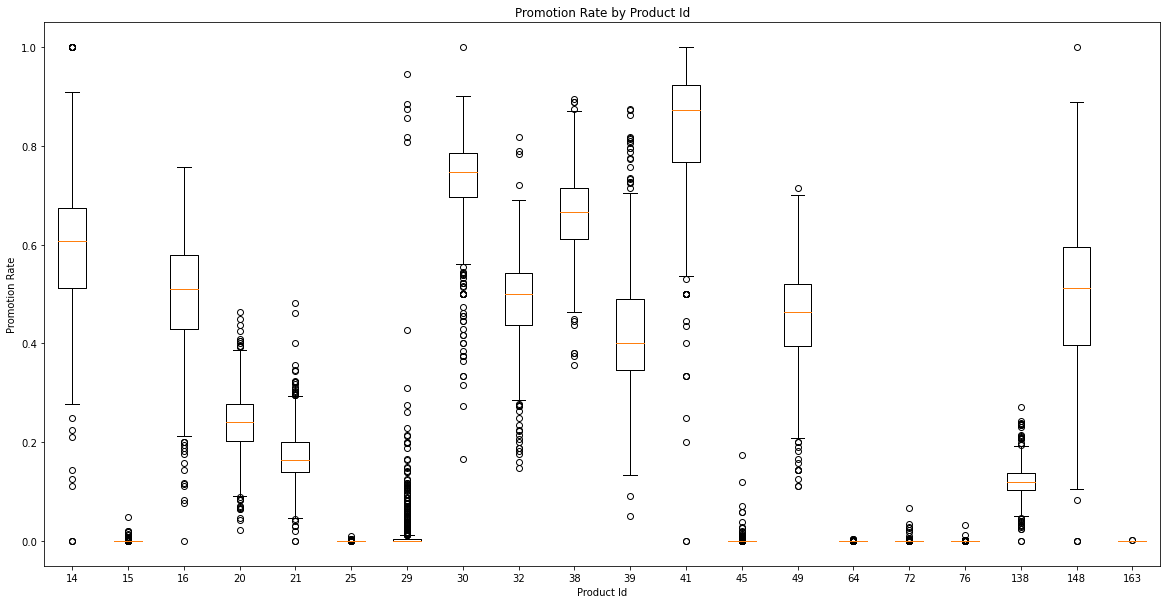

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(c.apply(lambda x: x.isPromoted.values))
ax.set_xticklabels(c.groups.keys())
plt.xlabel("Product Id")
plt.ylabel("Promotion Rate")
plt.title("Promotion Rate by Product Id")
plt.show()

Except ProductId = 29 others have either in sale or in non-sale. Therefore, no machine learning models can learn the effect of campaign in sales.

In [20]:
import numpy as np

In [49]:
import plotly.graph_objects as go
import numpy as np


# generate color list
colors=np.where(a.BeginDate.isnull(),'red','blue').tolist()

# create trace
trace = go.Scatter(
    x=a.Date, 
    y=a.PaidQty, 
    mode='markers+lines', 
    marker={'color': colors}, 
    line={'color': 'gray'}
)

# crate figure, plot 
fig = go.Figure(data=trace)
fig.show()

In [82]:
a.InvLevel.min()

0.0

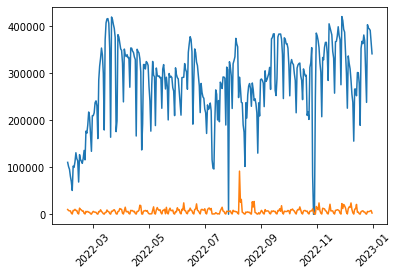

In [81]:
a = data_29_agg2
plt.plot(a.Date,a.InvLevel)
plt.plot(a.Date,a.TotalSales)
plt.xticks(rotation=45)
plt.show()

In [112]:
a = data_prep.loc[data_prep.ProductId == 21,["Date","Promo","BeginDate","EndDate"]]

In [113]:
x = a.drop_duplicates( ignore_index=True)

In [116]:
x.loc[x.Promo.notnull(), ["Promo","BeginDate","EndDate"]].drop_duplicates( ignore_index=True).\
sort_values(by=["BeginDate","EndDate"],ignore_index=True)

,Promo,BeginDate,EndDate
0,15-1,2022-02-01,2022-03-01
1,50-10,2022-02-01,2022-03-01
2,30-5,2022-02-01,2022-03-01
3,15-1,2022-03-01,2022-04-01
4,50-10,2022-03-01,2022-04-01
5,30-5,2022-03-01,2022-04-01
6,50-10,2022-04-01,2022-05-01
7,15-1,2022-04-01,2022-05-01
8,30-5,2022-04-01,2022-05-01
9,15-1,2022-05-01,2022-06-01


In [103]:
data_prep[(data_prep.ProductId == 29) &
          (data_prep.Date>="2023-04-01") &
          (data_prep.Date<"2023-09-30")].groupby("WeekStartDate")["PaidQty"].sum()

WeekStartDate
2023-03-27      8147
2023-04-03     84319
2023-04-10     42209
2023-04-17     30794
2023-04-24     50883
2023-05-01     45598
2023-05-08    104152
2023-05-15     35259
2023-05-22     52525
2023-05-29     59840
2023-06-05     88068
2023-06-12     74985
2023-06-19     57849
2023-06-26     13583
2023-07-03     62647
2023-07-10     60647
2023-07-17     71771
2023-07-24     28261
2023-07-31     48175
2023-08-07     30816
2023-08-14     34473
2023-08-21     31442
2023-08-28     33727
2023-09-04     35934
2023-09-11     36238
2023-09-18     35916
2023-09-25     31629
Name: PaidQty, dtype: int64

In [15]:
keys = ["Date","LocationId","MainDistributorId","DistributorId","PackageId",
        "BrickId","PaidQty","FreeQty"]

In [80]:
data_prep.dtypes

Date                 datetime64[ns]
LocationId                    int64
MainDistributorId             int64
DistributorId                 int64
PackageId                     int64
ProductId                     int64
City                         object
District                     object
BrickId                       int64
PaidQty                       int64
FreeQty                       int64
isPromoted                    int64
Discount                    float64
BeginDate            datetime64[ns]
EndDate              datetime64[ns]
Promo                        object
DStep                       float64
WeekStartDate        datetime64[ns]
dtype: object

In [3]:
data_29 = data_prep[data_prep.ProductId==29]

In [4]:
data_29["TotalSales"] = data_29["PaidQty"] + data_29["FreeQty"]

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\1284293056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["TotalSales"] = data_29["PaidQty"] + data_29["FreeQty"]


In [10]:
data_29.loc[data_29.Promo.notnull(),["Promo","BeginDate","EndDate"]].drop_duplicates( ignore_index=True)

,Promo,BeginDate,EndDate
0,10-1,2022-08-08,2022-08-11
1,10-1,2022-08-22,2022-08-25
2,9-1,2023-05-08,2023-05-12
3,20-3,2023-05-08,2023-05-12
4,9-1,2023-05-26,2023-05-30
5,20-3,2023-05-26,2023-05-30
6,9-1,2023-09-01,2023-10-01
7,20-3,2023-09-01,2023-10-01


In [56]:
condition = (data_29.Date>="2023-04-01") & (data_29.Date<"2023-09-30")

In [5]:
data_29["Promo"] = data_29["Promo"].fillna("NoPromo")

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\4244847502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["Promo"] = data_29["Promo"].fillna("NoPromo")


In [6]:
data_29["NoPromo"] = data_29["Promo"].apply(lambda x: 1 if x=="NoPromo" else 0)
data_29["is10-1"] = data_29["Promo"].apply(lambda x: 1 if x=="10-1" else 0)
data_29["is9-1"] = data_29["Promo"].apply(lambda x: 1 if x=="9-1" else 0)
data_29["is20-3"] = data_29["Promo"].apply(lambda x: 1 if x=="20-3" else 0)

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\1567407564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["NoPromo"] = data_29["Promo"].apply(lambda x: 1 if x=="NoPromo" else 0)
C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\1567407564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["is10-1"] = data_29["Promo"].apply(lambda x: 1 if x=="10-1" else 0)
C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\1567407564.py:3: SettingWithCopyWarning: 
A value is trying to be

In [93]:
data_29.dtypes

Date                 datetime64[ns]
LocationId                    int64
MainDistributorId             int64
DistributorId                 int64
PackageId                     int64
ProductId                     int64
City                         object
District                     object
BrickId                       int64
PaidQty                       int64
FreeQty                       int64
isPromoted                    int64
Discount                    float64
BeginDate            datetime64[ns]
EndDate              datetime64[ns]
Promo                        object
DStep                       float64
WeekStartDate        datetime64[ns]
TotalSales                    int64
NoPromo                       int64
is10-1                        int64
is9-1                         int64
is20-3                        int64
Month                      category
Day                        category
dtype: object

In [7]:
data_29.drop(['Month','Day'],axis=1,inplace=True)

KeyError: "['Month', 'Day'] not found in axis"

In [8]:
data_29["Month"] = data_29.Date.dt.month_name()
data_29["Day"] = data_29.Date.dt.day_name()

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\304100962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["Month"] = data_29.Date.dt.month_name()
C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\304100962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_29["Day"] = data_29.Date.dt.day_name()


In [184]:
data_29

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,...,Promo,DStep,WeekStartDate,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day
0,2023-01-02,2854453,2879223,2878715,568,29,Afyon,DİNAR,30601,10,...,NoPromo,0.0,2023-01-02,10,1,0,0,0,January,Monday
1,2022-06-29,2867763,2879249,2878795,568,29,Gaziantep,ŞEHİTKAMİL,270202,15,...,NoPromo,0.0,2022-06-27,15,1,0,0,0,June,Wednesday
2,2023-01-04,2877675,2879223,2878715,568,29,Uşak,BANAZ,640101,3,...,NoPromo,0.0,2023-01-02,3,1,0,0,0,January,Wednesday
3,2022-06-29,2918985,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,15,...,NoPromo,0.0,2022-06-27,15,1,0,0,0,June,Wednesday
4,2023-01-04,2854545,2879223,2878715,568,29,Afyon,MERKEZ,30001,20,...,NoPromo,0.0,2023-01-02,20,1,0,0,0,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523569,2022-06-29,2867564,2879249,2878795,568,29,Gaziantep,ŞAHİNBEY,270102,10,...,NoPromo,0.0,2022-06-27,10,1,0,0,0,June,Wednesday
523570,2022-06-29,2870586,2879249,2878795,568,29,Kahramanmaraş,DULKADİROĞLU,460002,5,...,NoPromo,0.0,2022-06-27,5,1,0,0,0,June,Wednesday
523571,2022-06-29,2876863,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,5,...,NoPromo,0.0,2022-06-27,5,1,0,0,0,June,Wednesday
523572,2022-06-29,2867642,2879249,2878795,568,29,Gaziantep,ŞAHİNBEY,270104,10,...,NoPromo,0.0,2022-06-27,10,1,0,0,0,June,Wednesday


In [87]:
data_29["Month"] = data_29["Month"]
data_29["Day"] = data_29["Day"]

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_20772\1338931835.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_20772\1338931835.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
data_29.dtypes

Date                 datetime64[ns]
LocationId                    int64
MainDistributorId             int64
DistributorId                 int64
PackageId                     int64
ProductId                     int64
City                         object
District                     object
BrickId                       int64
PaidQty                       int64
FreeQty                       int64
isPromoted                    int64
Discount                    float64
BeginDate            datetime64[ns]
EndDate              datetime64[ns]
Promo                        object
DStep                       float64
WeekStartDate        datetime64[ns]
TotalSales                    int64
NoPromo                       int64
is10-1                        int64
is9-1                         int64
is20-3                        int64
Month                        object
Day                          object
dtype: object

In [205]:
data_29_agg = data_29.groupby(by=["Date","ProductId"]).agg({"PaidQty":"sum","FreeQty":"sum","TotalSales":"sum",
                                                            "NoPromo":"min","is10-1":"max","is9-1":"max","is20-3":"max","Month":"max","Day":"max"}).reset_index()

In [28]:
data_29_agg2["lag_sales_7"] = data_29_agg2["TotalSales"].shift(7)

In [29]:
data_29_agg2["lag_sales"] = data_29_agg2["TotalSales"].shift(1)

In [52]:
for i in range(1,30):
    data_29_agg.drop("lag_sales_"+str(i),axis=1,inplace=True)

NameError: name 'data_29_agg' is not defined

In [ ]:
data_29_agg.head(20)

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,lag_sales,lag_sales_7
0,2022-02-01,29,10077,0,10077,1,0,0,0,2,1,NaN,NaN
1,2022-02-02,29,7830,0,7830,1,0,0,0,2,2,10077.0,NaN
2,2022-02-03,29,7103,0,7103,1,0,0,0,2,3,7830.0,NaN
3,2022-02-04,29,7093,25,7118,1,0,0,0,2,4,7103.0,NaN
4,2022-02-05,29,2380,0,2380,1,0,0,0,2,5,7118.0,NaN
5,2022-02-06,29,396,0,396,1,0,0,0,2,6,2380.0,NaN
6,2022-02-07,29,8087,0,8087,1,0,0,0,2,0,396.0,NaN
7,2022-02-08,29,8084,0,8084,1,0,0,0,2,1,8087.0,10077.0
8,2022-02-09,29,10414,0,10414,1,0,0,0,2,2,8084.0,7830.0
9,2022-02-10,29,7981,0,7981,1,0,0,0,2,3,10414.0,7103.0


In [131]:
categorical_cols = ["is10-1","is9-1","is20-3","Month","Day","isPromoted"]

data_29_agg[categorical_cols] = data_29_agg[categorical_cols].astype("categorical")

TypeError: data type 'categorical' not understood

In [208]:
# fill na in lag_sales_7 with total_sales
data_29_agg2["lag_sales_7"] = data_29_agg["lag_sales_7"].fillna(data_29_agg["TotalSales"])

In [30]:
data_29_agg2["isPromoted"] = data_29_agg2["FreeQty"].apply(lambda x: 1 if x>0 else 0)

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

c:\Users\yasin.secal\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
data_29_agg2.dtypes

Date           datetime64[ns]
ProductId               int64
PaidQty                 int64
FreeQty                 int64
TotalSales              int64
NoPromo                 int64
is10-1                  int64
is9-1                   int64
is20-3                  int64
Month                  object
Day                    object
InvLevel              float64
lag_sales_7           float64
lag_sales             float64
isPromoted              int64
dtype: object

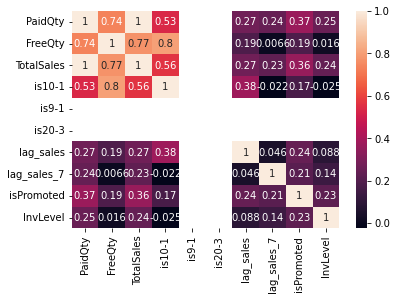

In [33]:
sns.heatmap(data_29_agg2[['PaidQty','FreeQty','TotalSales','is10-1','is9-1','is20-3','Month','Day',"lag_sales","lag_sales_7","isPromoted","InvLevel"]].corr(), annot=True)
plt.show()

In [37]:
data_29_agg2

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,InvLevel,lag_sales_7,lag_sales,isPromoted
0,2022-02-01,29,10077,0,10077,1,0,0,0,February,Tuesday,110292.0,NaN,NaN,0
1,2022-02-02,29,7830,0,7830,1,0,0,0,February,Wednesday,101216.0,NaN,10077.0,0
2,2022-02-03,29,7103,0,7103,1,0,0,0,February,Thursday,95471.0,NaN,7830.0,0
3,2022-02-04,29,7093,25,7118,1,0,0,0,February,Friday,80460.0,NaN,7103.0,1
4,2022-02-05,29,2380,0,2380,1,0,0,0,February,Saturday,69137.0,NaN,7118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2022-12-27,29,5369,0,5369,1,0,0,0,December,Tuesday,396142.0,6680.0,5947.0,0
330,2022-12-28,29,5818,0,5818,1,0,0,0,December,Wednesday,393984.0,7360.0,5369.0,0
331,2022-12-29,29,6872,3,6875,1,0,0,0,December,Thursday,390968.0,4752.0,5818.0,1
332,2022-12-30,29,7934,0,7934,1,0,0,0,December,Friday,365472.0,4754.0,6875.0,0


In [63]:
train = data_29_agg2[data_29_agg2.Date<"2022-08-24"]
test = data_29_agg2[data_29_agg2.Date=="2022-08-24"]


In [144]:
train[train.Date == "2022-08-24"]

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,lag_sales,lag_sales_7,isPromoted
204,2022-08-24,29,24726,2400,27126,0,1,0,0,8,2,15461.0,5130.0,1


In [40]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder

enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)

enc_df = pd.DataFrame(enc.fit_transform(data_29_agg[['Month','Day']]).toarray(),columns=enc.get_feature_names_out(['Month','Day']))

# merge with main df bridge_df on key values

data_29_agg2 = data_29_agg2.join(enc_df)




In [62]:
data_29_agg2.drop(['Month','Day'],axis=1,inplace=True)


In [43]:
train

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,InvLevel,lag_sales_7,lag_sales,isPromoted
0,2022-02-01,29,10077,0,10077,1,0,0,0,February,Tuesday,110292.0,NaN,NaN,0
1,2022-02-02,29,7830,0,7830,1,0,0,0,February,Wednesday,101216.0,NaN,10077.0,0
2,2022-02-03,29,7103,0,7103,1,0,0,0,February,Thursday,95471.0,NaN,7830.0,0
3,2022-02-04,29,7093,25,7118,1,0,0,0,February,Friday,80460.0,NaN,7103.0,1
4,2022-02-05,29,2380,0,2380,1,0,0,0,February,Saturday,69137.0,NaN,7118.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2022-08-19,29,4067,15,4082,1,0,0,0,August,Friday,277843.0,3237.0,3856.0,1
200,2022-08-20,29,1183,0,1183,1,0,0,0,August,Saturday,267887.0,1021.0,4082.0,0
201,2022-08-21,29,387,0,387,1,0,0,0,August,Sunday,229466.0,321.0,1183.0,0
202,2022-08-22,29,24271,2268,26539,0,1,0,0,August,Monday,279064.0,4740.0,387.0,1


In [64]:

target = "TotalSales"

train_x = train.drop([target,"Date","PaidQty","FreeQty"],axis=1)
train_y = train[target]
test_x = test.drop([target,"Date","PaidQty","FreeQty"],axis=1)
test_y = test[target]

In [65]:
train_x.dtypes

ProductId            int64
NoPromo              int64
is10-1               int64
is9-1                int64
is20-3               int64
InvLevel           float64
lag_sales_7        float64
lag_sales          float64
isPromoted           int64
Month_April        float64
Month_August       float64
Month_December     float64
Month_February     float64
Month_July         float64
Month_June         float64
Month_March        float64
Month_May          float64
Month_November     float64
Month_October      float64
Month_September    float64
Day_Friday         float64
Day_Monday         float64
Day_Saturday       float64
Day_Sunday         float64
Day_Thursday       float64
Day_Tuesday        float64
Day_Wednesday      float64
dtype: object

In [45]:
import xgboost as xgb


c:\Users\yasin.secal\Anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [66]:
model = xgb.XGBRegressor()

In [67]:
params ={
            "learning_rate": 0.05,
            "n_estimators": 100,
            "max_depth": 6,
            "booster": "gbtree",
            "min_child_weight": 4,
            "subsample": 1,
            "colsample_bytree": 0.85,
            "grow_policy": "lossguide",
            "eval_metric": "mae",
            "importance_type": "weight",
            "verbosity": 2,
            "n_jobs": 1,
            "enable_categorical": True
          }

In [68]:
model = model.set_params(**params)

In [69]:
model

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.85,
             enable_categorical=True, eval_metric='mae', gamma=None,
             gpu_id=None, grow_policy='lossguide', importance_type='weight',
             interaction_constraints=None, learning_rate=0.05,
             max_delta_step=None, max_depth=6, min_child_weight=4, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=1,
             num_parallel_tree=None, random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=1,
             tree_method=None, validate_parameters=None, verbosity=2)

In [70]:
model.fit(train_x,train_y)

c:\Users\yasin.secal\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[09:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:51:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[09:51:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[09:51:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[09:51:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/up

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, enable_categorical=True,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='weight', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

In [254]:
train_x.columns

Index(['ProductId', 'NoPromo', 'is10-1', 'is9-1', 'is20-3', 'lag_sales_7',
       'lag_sales', 'isPromoted', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Day_Friday', 'Day_Monday',
       'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday',
       'Day_Wednesday'],
      dtype='object')

In [255]:
train_x_dmatrix = xgb.DMatrix(train_x, label=train_y,enable_categorical=True)

In [165]:
model = xgb.train(params, train_x_dmatrix, num_boost_round=10)

[23:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "enable_categorical", "importance_type", "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:23:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[23:23:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[23:23:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=5
[23:23:20] INFO: C:/Users/Administrator/workspace/xgbo

In [167]:
test_x_dmatrix = xgb.DMatrix(test_x, label=test_y,enable_categorical=True)

c:\Users\yasin.secal\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [71]:
test["prediction"] = model.predict(test_x)

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\54548221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = model.predict(test_x)


In [72]:
test["MAPE"]=abs(test["TotalSales"]-test["prediction"])/test["TotalSales"]

C:\Users\yasin.secal\AppData\Local\Temp\ipykernel_7496\873903790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["MAPE"]=abs(test["TotalSales"]-test["prediction"])/test["TotalSales"]


In [73]:
test

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,InvLevel,...,Month_September,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,prediction,MAPE
204,2022-08-24,29,24726,2400,27126,0,1,0,0,241813.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36953.855469,0.362304


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

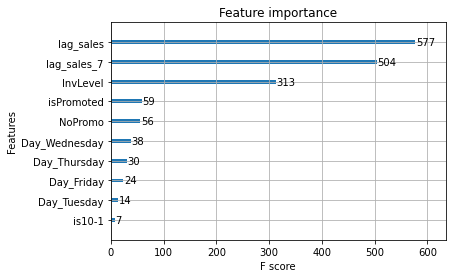

In [74]:
# plot feature importances
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)

In [9]:
inv_data = pd.read_csv("c:/users/yasin.secal/Downloads/inv_2022.csv",index_col=0)

In [297]:
condition =[inv_data.PackageId==data_29.PackageId,
            inv_data.DistributorId==data_29.DistributorId,
            inv_data.Date==data_29.Date]

ValueError: Can only compare identically-labeled Series objects

In [10]:
inv_data["Date"] = inv_data["Date"].astype("datetime64")

In [19]:
data_29_agg = data_29.groupby(by=["Date","PackageId","DistributorId","ProductId"]).agg({"PaidQty":"sum","FreeQty":"sum","TotalSales":"sum","NoPromo":"min","is10-1":"max","is9-1":"max","is20-3":"max","Month":"max","Day":"max"}).reset_index()

In [20]:
data_29_agg = data_29_agg.merge(inv_data,on=["ProductId","PackageId","DistributorId","Date"],how="left")

In [22]:
data_29_agg = data_29_agg[data_29_agg.Date.dt.year==2022]

In [24]:
data_29_agg2 = data_29_agg.groupby(by=["Date","ProductId"]).agg({"PaidQty":"sum","FreeQty":"sum","TotalSales":"sum","NoPromo":"min","is10-1":"max","is9-1":"max","is20-3":"max","Month":"max","Day":"max","InvLevel":"sum"}).reset_index()

In [25]:
data_29_agg2

,Date,ProductId,PaidQty,FreeQty,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,InvLevel
0,2022-02-01,29,10077,0,10077,1,0,0,0,February,Tuesday,110292.0
1,2022-02-02,29,7830,0,7830,1,0,0,0,February,Wednesday,101216.0
2,2022-02-03,29,7103,0,7103,1,0,0,0,February,Thursday,95471.0
3,2022-02-04,29,7093,25,7118,1,0,0,0,February,Friday,80460.0
4,2022-02-05,29,2380,0,2380,1,0,0,0,February,Saturday,69137.0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,2022-12-27,29,5369,0,5369,1,0,0,0,December,Tuesday,396142.0
330,2022-12-28,29,5818,0,5818,1,0,0,0,December,Wednesday,393984.0
331,2022-12-29,29,6872,3,6875,1,0,0,0,December,Thursday,390968.0
332,2022-12-30,29,7934,0,7934,1,0,0,0,December,Friday,365472.0


In [14]:
data2 = data_29[data_29.Date.dt.year==2022]

In [15]:
data2

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,...,DStep,WeekStartDate,TotalSales,NoPromo,is10-1,is9-1,is20-3,Month,Day,InvLevel
1,2022-06-29,2867763,2879249,2878795,568,29,Gaziantep,ŞEHİTKAMİL,270202,15,...,0.0,2022-06-27,15,1,0,0,0,June,Wednesday,4934.0
3,2022-06-29,2918985,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,15,...,0.0,2022-06-27,15,1,0,0,0,June,Wednesday,4934.0
5,2022-06-29,2876609,2879249,2878795,568,29,Şanlıurfa,CEYLANPINAR,630101,1,...,0.0,2022-06-27,1,1,0,0,0,June,Wednesday,4934.0
7,2022-06-29,2871775,2879249,2878795,568,29,Kilis,MERKEZ,790001,5,...,0.0,2022-06-27,5,1,0,0,0,June,Wednesday,4934.0
9,2022-06-29,2867636,2879249,2878795,568,29,Gaziantep,ŞAHİNBEY,270104,30,...,0.0,2022-06-27,30,1,0,0,0,June,Wednesday,4934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523569,2022-06-29,2867564,2879249,2878795,568,29,Gaziantep,ŞAHİNBEY,270102,10,...,0.0,2022-06-27,10,1,0,0,0,June,Wednesday,4934.0
523570,2022-06-29,2870586,2879249,2878795,568,29,Kahramanmaraş,DULKADİROĞLU,460002,5,...,0.0,2022-06-27,5,1,0,0,0,June,Wednesday,4934.0
523571,2022-06-29,2876863,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,5,...,0.0,2022-06-27,5,1,0,0,0,June,Wednesday,4934.0
523572,2022-06-29,2867642,2879249,2878795,568,29,Gaziantep,ŞAHİNBEY,270104,10,...,0.0,2022-06-27,10,1,0,0,0,June,Wednesday,4934.0


In [282]:
import os
os.getcwd()

'c:\\Users\\yasin.secal\\Desktop\\PharmaProject\\PharmaProject'

In [318]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [319]:
spark = SparkSession.builder.appName("Forecasting")\
                .config('spark.sql.session.timeZone', 'UTC') \
                .config('spark.driver.memory','600M') \
                .config('spark.ui.showConsoleProgress', True) \
                .config('spark.sql.repl.eagerEval.enabled', True) \
                .getOrCreate()

In [334]:
inv_data = spark.read.csv("c:/users/yasin.secal/Downloads/inv_2022.csv",header=True)

In [333]:
inv_data.printSchema()

root
 |-- ProductId: string (nullable = true)
 |-- PackageId: string (nullable = true)
 |-- DistributorId: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- InvLevel: string (nullable = true)



In [326]:
inv_data = inv_data.select("ProductId","PackageId","DistributorId","Date","InvLevel")

In [337]:
inv_data = inv_data.withColumn("Date",F.to_date(F.col("Date"),"yyyy-MM-dd"))

In [ ]:
data = spark.createDataFrame(data_29)

: 